# <span style="color: blue;">Taller pandas</span>

## <span style="color: blue;">Autor</span>

* Johan Stevan Sáenz Robayo.

## Contenido
* ¿Qué es ?
  * ¿cómo importar datos?
* Seleccionar subconjuntos de una base de datos
  * Escoger columnas
  * Escoger filas
  * Filas con valores específicos
* Eliminar valores omitidos
* Manipulación de datos textuales (limpieza)
* Creación de columnas a partir de otras
  * Renombrar columnas
* Modificar tipo de dato de una columna
  * Eliminar filas y columnas
  * Conteos
* Modificar tablas
* Múltiples índices
* Concatenar y unir
* Series de tiempo y time stamps


## <span style="color: blue;">¿Qué es?</span>
  
Pandas es un paquete con base en python para el análisis y manipulación de datos.

In [4]:
#importando pandas
import pandas as pd

### <span style="color: blue;">¿Cómo importar datos?</span>

Para leer los datos la estructura básica es *pd.read_tipo-archivo*. Si estamos en colab y queremos utilizar algunos datos que están en nuestro google drive podemos utilizar:

    from google.colab import drive
    drive.mount('/content/gdrive')

pero esto solo sirve en google colab, por otro lado tenemos:

In [5]:
counties= pd.read_excel("C:/Users/Steva/Downloads/counties.xlsx")#cambiar dirección

Para tener una idea de qué variables y datos tengo en lo base de datos, sólo debemos llamarla.

In [7]:
counties

,codestate,codecounty,county,population,area
0,1,1001,Auta#%&()uga,54571.0,594.436000
1,1,1003,Baldwin#%&() ?,182265.0,1589.784000
2,1,1005,Barbour,27457.0,884.876000
3,1,1007,Bi#%&()bb,22915.0,622.582000
4,1,1009,Blount ?,57322.0,644.776000
...,...,...,...,...,...
3229,72,72151,Yabucoa,37941.0,55.215000
3230,72,72153,Ya_uco,42043.0,68.192000
3231,78,78010,; St. Croix ?,50601.0,83.345868
3232,78,78020,St. John,4170.0,19.689867


En lo anterior veiamos todas las variables con las 5 primeras y 5 últimas filas. Pero, podemos ver una cantidad determinada de registros tanto del inicio de la tabla como del final. Utlizando  `.head()` y `.tail()` respectivamente.

In [10]:
counties.head(4) #por defecto salen 5 primeros

,codestate,codecounty,county,population,area
0,1,1001,Auta#%&()uga,54571.0,594.436
1,1,1003,Baldwin#%&() ?,182265.0,1589.784
2,1,1005,Barbour,27457.0,884.876
3,1,1007,Bi#%&()bb,22915.0,622.582


In [12]:
counties.tail(3)

,codestate,codecounty,county,population,area
3231,78,78010,; St. Croix ?,50601.0,83.345868
3232,78,78020,St. John,4170.0,19.689867
3233,78,78030,St. Thomas,51634.0,31.313503


Si aparte de ver solamente la tabla, queremos más información de la base de datos, por ejemplo sus dimensiones y tipo de variables podemos utilizar lo siguiente:

In [13]:
counties.info()
print("\n")
print("La forma de la base de datos es:",counties.shape)  #shape:forma de un array

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234 entries, 0 to 3233
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codestate   3234 non-null   int64  
 1   codecounty  3234 non-null   int64  
 2   county      3234 non-null   object 
 3   population  3232 non-null   float64
 4   area        3234 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 126.5+ KB


La forma de la base de datos es: (3234, 5)


In [17]:
print(counties.dtypes) #tipo de objeto en cada columna
print("\n")
print(counties.describe())
print("\n")
print(counties.describe(include="all"))
#summary, si no se pone el "include" solo aparece de las variables numéricas

codestate       int64
codecounty      int64
county         object
population    float64
area          float64
dtype: object


         codestate    codecounty    population           area
count  3234.000000   3234.000000  3.232000e+03    3234.000000
mean     31.441868  31544.737786  9.679656e+04    1093.361817
std      16.411236  16425.545223  3.088044e+05    3564.706999
min       1.000000   1001.000000  1.700000e+01       0.031696
25%      19.000000  19039.500000  1.129700e+04     416.360000
50%      30.000000  30038.000000  2.607550e+04     602.977500
75%      46.000000  46128.500000  6.566050e+04     913.884500
max      78.000000  78030.000000  9.818605e+06  145504.789000


          codestate    codecounty    county    population           area
count   3234.000000   3234.000000      3234  3.232000e+03    3234.000000
unique          NaN           NaN      2625           NaN            NaN
top             NaN           NaN  Lincoln            NaN            NaN
freq            NaN   

## <span style="color: blue;">Seleccionar subconjuntos de una base de datos</span>

### <span style="color: blue;">Escoger columnas</span>
para ver el nombre de las columnas que existen, podemos utilizar `.columns` 

In [19]:
counties.columns

Index(['codestate', 'codecounty', 'county', 'population', 'area'], dtype='object')

Escoger una columna específica o un conjunto de ellas

In [20]:
condado = counties["county"]

In [21]:
print(condado.shape) #array unidimensional con 3234 elementos
print(counties["county"].shape)
print(type(condado))

(3234,)
(3234,)
<class 'pandas.core.series.Series'>


In [22]:
codi_condado=counties[["codecounty","county"]] # con dos variables
print(codi_condado)
print(type(codi_condado))

      codecounty                 county
0           1001          Auta#%&()uga 
1           1003   Baldwin#%&()  ?     
2           1005               Barbour 
3           1007             Bi#%&()bb 
4           1009         Blount  ?     
...          ...                    ...
3229       72151               Yabucoa 
3230       72153                Ya_uco 
3231       78010     ; St. Croix ?     
3232       78020               St. John
3233       78030             St. Thomas

[3234 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


### <span style="color: blue;">Escoger columnas</span>

Podemos escoger ciertas filas a través de su posición. utilizando `.iloc` 

In [24]:
from seaborn import load_dataset

In [25]:
print(counties.iloc[0:1,])
print(type(counties.iloc[0:1,]))

   codestate  codecounty         county  population     area
0          1        1001  Auta#%&()uga      54571.0  594.436
<class 'pandas.core.frame.DataFrame'>


In [26]:
print(counties.iloc[8:12,1:3])

    codecounty                 county
8         1017     ; Chambers  ?     
9         1019              Cherokee 
10        1021             ; Chilton 
11        1023               Choctaw 


O también escoger filas con base a alguna condicion o característica específica.

In [27]:
counties["codestate"] > 72 #Verdadero o falso si cumple la condición

0       False
1       False
2       False
3       False
4       False
        ...  
3229    False
3230    False
3231     True
3232     True
3233     True
Name: codestate, Length: 3234, dtype: bool

In [30]:
codsat72 = counties[counties["codestate"] > 72] # Llama aquellos cuyo valor es verdadero
codsat72.info()
codsat72.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 3231 to 3233
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codestate   3 non-null      int64  
 1   codecounty  3 non-null      int64  
 2   county      3 non-null      object 
 3   population  3 non-null      float64
 4   area        3 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 144.0+ bytes


,codestate,codecounty,county,population,area
3231,78,78010,; St. Croix ?,50601.0,83.345868
3232,78,78020,St. John,4170.0,19.689867
3233,78,78030,St. Thomas,51634.0,31.313503


Filas que no tengan valores faltantes en determinada columna

In [31]:
no_na = counties[counties["population"].notna()]
print(no_na.shape)
print(counties.shape)

(3232, 5)
(3234, 5)


### <span style="color: blue;">Filas con valores específicos</span>

Existen varias maneras de relaizar estas búsquedas, algunas de ellas son utilizando `isin`, `loc` y `or` de la librería `seaborn`.  

In [32]:
codcou1 = counties[counties["codecounty"].isin([78010, 72151])]
codcou1

,codestate,codecounty,county,population,area
3229,72,72151,Yabucoa,37941.0,55.215000
3231,78,78010,; St. Croix ?,50601.0,83.345868


In [33]:
codcou2 = counties.loc[:, 'codecounty'] == 78010
codcou2_ = counties.loc[codcou2]
codcou2_

,codestate,codecounty,county,population,area
3231,78,78010,; St. Croix ?,50601.0,83.345868


In [34]:
counties[(counties["codecounty"] == 78010) | (counties["codecounty"] == 72151)]

,codestate,codecounty,county,population,area
3229,72,72151,Yabucoa,37941.0,55.215000
3231,78,78010,; St. Croix ?,50601.0,83.345868


Filas con más de una característica específica.

In [37]:
condiciones = counties[(counties["codestate"] == 72) & (counties["area"] >= 70)]
condiciones.info()
condiciones.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 3159 to 3224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codestate   7 non-null      int64  
 1   codecounty  7 non-null      int64  
 2   county      7 non-null      object 
 3   population  7 non-null      float64
 4   area        7 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


,codestate,codecounty,county,population,area
3159,72,72013,Arec#%&()ibo,96440.0,125.947
3164,72,72023,Cabo Rojo ?,50917.0,70.374
3174,72,72043,Coamo #%&() ?,40512.0,78.012
3202,72,72097,Mayagüez,89080.0,77.645
3210,72,72113,Pon#%&()ce,166327.0,114.762


### <span style="color: blue;">Eliminar valores omitidos</span>

In [38]:
#Eliminar valores omitidos: dropna
# axis= 0 -> Eliminar fila completa
# axis=1 -> Eliminar columna completa
counties.dropna(subset=["population"], axis=0, inplace=False) #inplace:modifique directamente la BD

,codestate,codecounty,county,population,area
0,1,1001,Auta#%&()uga,54571.0,594.436000
1,1,1003,Baldwin#%&() ?,182265.0,1589.784000
2,1,1005,Barbour,27457.0,884.876000
3,1,1007,Bi#%&()bb,22915.0,622.582000
4,1,1009,Blount ?,57322.0,644.776000
...,...,...,...,...,...
3229,72,72151,Yabucoa,37941.0,55.215000
3230,72,72153,Ya_uco,42043.0,68.192000
3231,78,78010,; St. Croix ?,50601.0,83.345868
3232,78,78020,St. John,4170.0,19.689867


## <span style="color: blue;">Manipulación datos textuales (Limpieza)</span>
Para realizarle limpieza a la columna *county* de la base de datos *counties*, podemos utilizar lo siguiente:

* **lower:** Poner en minúscula toda el texto.
* **replace:** Remplazar ciertos valores por otros.
* **strip:** Eliminar los espacios al principio y al final de la cadena.
* **title:** Poner primera letra de cada palabra en mayúscula.

In [42]:
counties["county"] = (counties["county"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ]","")
                            .str.replace(" +"," ")
                            .str.strip()
                            .str.title()
                           )

C:\Users\Steva\AppData\Local\Temp\ipykernel_13080\3165492331.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  counties["county"] = (counties["county"]


In [41]:
print(counties)

      codestate  codecounty     county  population         area
0             1        1001    Autauga     54571.0   594.436000
1             1        1003    Baldwin    182265.0  1589.784000
2             1        1005    Barbour     27457.0   884.876000
3             1        1007       Bibb     22915.0   622.582000
4             1        1009     Blount     57322.0   644.776000
...         ...         ...        ...         ...          ...
3229         72       72151    Yabucoa     37941.0    55.215000
3230         72       72153      Yauco     42043.0    68.192000
3231         78       78010   St Croix     50601.0    83.345868
3232         78       78020    St John      4170.0    19.689867
3233         78       78030  St Thomas     51634.0    31.313503

[3234 rows x 5 columns]


## <span style="color: blue;">Creación de columnas a partir de otras</span>

In [43]:
counties["densidad"]= counties["population"]/counties["area"]
print(counties[["densidad","population","area"]])

         densidad  population         area
0       91.802986     54571.0   594.436000
1      114.647650    182265.0  1589.784000
2       31.029206     27457.0   884.876000
3       36.806397     22915.0   622.582000
4       88.902192     57322.0   644.776000
...           ...         ...          ...
3229   687.150231     37941.0    55.215000
3230   616.538597     42043.0    68.192000
3231   607.120676     50601.0    83.345868
3232   211.784062      4170.0    19.689867
3233  1648.937201     51634.0    31.313503

[3234 rows x 3 columns]


### <span style="color: blue;">Renombrar columnas</span>

In [44]:
print(counties.columns)
counties.rename(columns={"densidad":"densidad_pob"},inplace=True) #renombrar columna
print(counties.columns) #Verificación

Index(['codestate', 'codecounty', 'county', 'population', 'area', 'densidad'], dtype='object')
Index(['codestate', 'codecounty', 'county', 'population', 'area',
       'densidad_pob'],
      dtype='object')


## <span style="color: blue;">Modificar tipo de dato de una columna</span>

In [46]:
print(counties.info())
print("\n")
counties["codestate"]=counties["codestate"].astype("float")
print(counties.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234 entries, 0 to 3233
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codestate     3234 non-null   int64  
 1   codecounty    3234 non-null   int64  
 2   county        3234 non-null   object 
 3   population    3232 non-null   float64
 4   area          3234 non-null   float64
 5   densidad_pob  3232 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 151.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234 entries, 0 to 3233
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codestate     3234 non-null   float64
 1   codecounty    3234 non-null   int64  
 2   county        3234 non-null   object 
 3   population    3232 non-null   float64
 4   area          3234 non-null   float64
 5   densidad_pob  3232 non-null   float64
dtypes: float64(4), int64(1),

### <span style="color: blue;">Eliminar filas y columnas</span>
Eliminación filas, puede ser por posición o que cumpla una característica

In [47]:
print(counties.shape)
counties = counties.drop(counties.iloc[0:3,].index)
counties = counties.drop(counties[counties['codecounty']==70].index)
print(counties.shape)

(3234, 6)
(3231, 6)


In [48]:
counties.drop(['densidad_pob'], axis=1,inplace=True) #inplace=True, para que me modifique la BD
counties.columns

Index(['codestate', 'codecounty', 'county', 'population', 'area'], dtype='object')

### <span style="color: blue;">Conteos</span>

In [50]:
counties.groupby("codestate")["codecounty"].count().head(15)

codestate
1.0      64
2.0      29
4.0      15
5.0      75
6.0      58
8.0      64
9.0       8
10.0      3
11.0      1
12.0     67
13.0    159
15.0      5
16.0     44
17.0    102
18.0     92
Name: codecounty, dtype: int64

## <span style="color: blue;">Modificar tablas</span>
es posible hacer cambios de orden y estructura en las tablas de pandas.

In [52]:
folder_path="C:/Users/Steva/Downloads/"

In [53]:
elections=pd.read_excel(folder_path+"elections.xlsx")
elections.head(5)

,year,democrat,republic,other,codecounty
0,2000,4942,11993,273,1001
1,2000,13997,40872,1611,1003
2,2000,5188,5096,111,1005
3,2000,2710,4273,118,1007
4,2000,4977,12667,329,1009


organicemos los datos descendentemente depende de la cantidad de votos democratas

In [54]:
elections.sort_values(["democrat"], ascending=False)

,year,democrat,republic,other,codecounty
12626,2016,2464364,769743,200201,6037
6400,2008,2295853,956425,65970,6037
9513,2012,2216903,885333,78831,6037
3287,2004,1907736,1076225,37686,6037
175,2000,1710505,871930,112719,6037
...,...,...,...,...,...
11981,2012,9,54,1,48301
8852,2008,8,151,4,48269
11965,2012,5,139,1,48269
15078,2016,5,149,5,48269


usando `groupby()` podemos juntar los datos por año y sumarlos para tener el total de votos por año.

In [56]:
elections.groupby('year')[['democrat', 'republic']].sum()

,democrat,republic
year,,
2000,50922964,50290498
2004,58614073,61603653
2008,69204582,59703000
2012,65508961,60460609
2016,65626398,62790289


Podemos aplicar ambos métodos en un mismo código

In [57]:
elections_sort=(elections.groupby('year')[['democrat', 'republic']]
                .sum()
                .sort_values('democrat', ascending=False))
display(elections_sort)

,democrat,republic
year,,
2008,69204582,59703000
2016,65626398,62790289
2012,65508961,60460609
2004,58614073,61603653
2000,50922964,50290498


Para reestructuras los datos usamos la función `pivot()`

In [58]:
pivot_elections=elections.pivot(index='codecounty',
                columns='year',
                values=['democrat','republic'])
pivot_elections.head()

democrat                                     republic           \
year           2000     2004     2008     2012     2016     2000     2004   
codecounty                                                                  
1001         4942.0   4758.0   6093.0   6363.0   5936.0  11993.0  15196.0   
1003        13997.0  15599.0  19386.0  18424.0  18458.0  40872.0  52971.0   
1005         5188.0   4832.0   5697.0   5912.0   4871.0   5096.0   5899.0   
1007         2710.0   2089.0   2299.0   2202.0   1874.0   4273.0   5472.0   
1009         4977.0   3938.0   3522.0   2970.0   2156.0  12667.0  17386.0   

                                       
year           2008     2012     2016  
codecounty                             
1001        17403.0  17379.0  18172.0  
1003        61271.0  66016.0  72883.0  
1005         5866.0   5550.0   5454.0  
1007         6262.0   6132.0   6738.0  
1009        20389.0  20757.0  22859.0

## <span style="color: blue;">Múltiples índices</span>
Se pueden elegir múltiples variables como índice del dataframe. Esto es útil para facilitar la extracción de informacion en ciertos casos

In [59]:
counties_multi=pd.read_excel(folder_path+"counties.xlsx", index_col=[0, 1])
display(counties_multi)

county  population         area
codestate codecounty                                                
1         1001                Auta#%&()uga      54571.0   594.436000
          1003         Baldwin#%&()  ?         182265.0  1589.784000
          1005                     Barbour      27457.0   884.876000
          1007                   Bi#%&()bb      22915.0   622.582000
          1009               Blount  ?          57322.0   644.776000
...                                     ...         ...          ...
72        72151                    Yabucoa      37941.0    55.215000
          72153                     Ya_uco      42043.0    68.192000
78        78010          ; St. Croix ?          50601.0    83.345868
          78020                    St. John      4170.0    19.689867
          78030                  St. Thomas     51634.0    31.313503

[3234 rows x 3 columns]

Podemos obtener la suma de la población de cada estado

In [61]:
counties_multi['population'].sum(level='codestate').head(5)

C:\Users\Steva\AppData\Local\Temp\ipykernel_13080\18339036.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  counties_multi['population'].sum(level='codestate').head(5)


codestate
1     4779736.0
2      710231.0
4     6392017.0
5     2915918.0
6    37253956.0
Name: population, dtype: float64

## <span style="color: blue;">Concatenar y unir</span>
Es posible unir varias tablas tanto vertical como horizontalmente.

En ambos casos, podemos usar `concat()`, y se juntarán las bases con bases a los nombres de columnas o los índices de filas.

In [63]:
elections_2000=elections[elections['year']==2000]
display(elections_2000) #display:ejecuta el método dunder apropiado para obtener los datos apropiados para mostrar

,year,democrat,republic,other,codecounty
0,2000,4942,11993,273,1001
1,2000,13997,40872,1611,1003
2,2000,5188,5096,111,1005
3,2000,2710,4273,118,1007
4,2000,4977,12667,329,1009
...,...,...,...,...,...
3107,2000,5521,9425,745,56037
3108,2000,4019,5454,958,56039
3109,2000,1650,5469,299,56041
3110,2000,806,3138,107,56043


In [64]:
elections_2004=elections[elections['year']==2004]
elections_2004['dummy']=0
display(elections_2004)

C:\Users\Steva\AppData\Local\Temp\ipykernel_13080\3665125724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elections_2004['dummy']=0


,year,democrat,republic,other,codecounty,dummy
3112,2004,4758,15196,127,1001,0
3113,2004,15599,52971,750,1003,0
3114,2004,4832,5899,46,1005,0
3115,2004,2089,5472,39,1007,0
3116,2004,3938,17386,180,1009,0
...,...,...,...,...,...,...
6220,2004,5208,10653,411,56037,0
6221,2004,5972,5124,263,56039,0
6222,2004,1815,6081,185,56041,0
6223,2004,855,3200,59,56043,0


Si se hace la concatenación sin más, se tomarán todas las columnas y se agregarán NaN

In [65]:
elections_00_04=pd.concat([elections_2000, elections_2004])
display(elections_00_04)

,year,democrat,republic,other,codecounty,dummy
0,2000,4942,11993,273,1001,NaN
1,2000,13997,40872,1611,1003,NaN
2,2000,5188,5096,111,1005,NaN
3,2000,2710,4273,118,1007,NaN
4,2000,4977,12667,329,1009,NaN
...,...,...,...,...,...,...
6220,2004,5208,10653,411,56037,0.0
6221,2004,5972,5124,263,56039,0.0
6222,2004,1815,6081,185,56041,0.0
6223,2004,855,3200,59,56043,0.0


Ahora, usando `merge()`, podemos hacer uniones de tablas de forma horizontal que compartan una columna/índice en común.

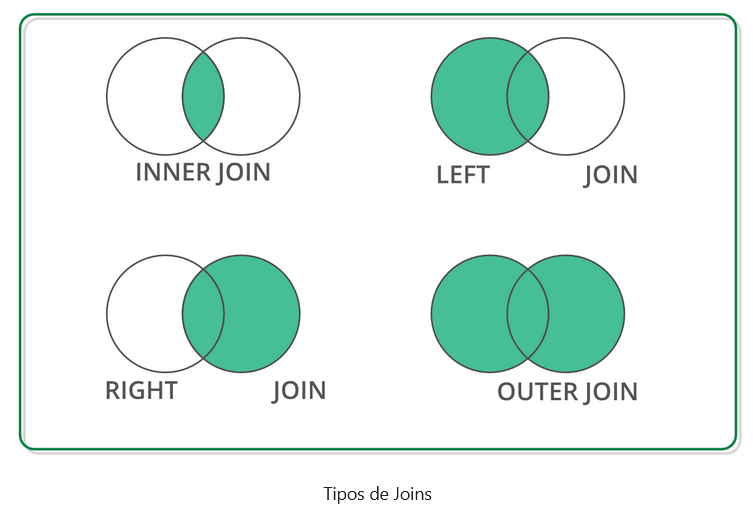

In [66]:
display(counties)

,codestate,codecounty,county,population,area
3,1.0,1007,Bibb,22915.0,622.582000
4,1.0,1009,Blount,57322.0,644.776000
5,1.0,1011,Bullock,10914.0,622.805000
6,1.0,1013,Butler,20947.0,776.829000
7,1.0,1015,Calhoun,118572.0,605.868000
...,...,...,...,...,...
3229,72.0,72151,Yabucoa,37941.0,55.215000
3230,72.0,72153,Yauco,42043.0,68.192000
3231,78.0,78010,St Croix,50601.0,83.345868
3232,78.0,78020,St John,4170.0,19.689867


In [67]:
inner_joined=pd.merge(elections, counties)
inner_joined.head(10)

,year,democrat,republic,other,codecounty,codestate,county,population,area
0,2000,2710,4273,118,1007,1.0,Bibb,22915.0,622.582
1,2004,2089,5472,39,1007,1.0,Bibb,22915.0,622.582
2,2008,2299,6262,83,1007,1.0,Bibb,22915.0,622.582
3,2012,2202,6132,86,1007,1.0,Bibb,22915.0,622.582
4,2016,1874,6738,207,1007,1.0,Bibb,22915.0,622.582
5,2000,4977,12667,329,1009,1.0,Blount,57322.0,644.776
6,2004,3938,17386,180,1009,1.0,Blount,57322.0,644.776
7,2008,3522,20389,356,1009,1.0,Blount,57322.0,644.776
8,2012,2970,20757,279,1009,1.0,Blount,57322.0,644.776
9,2016,2156,22859,573,1009,1.0,Blount,57322.0,644.776


In [68]:
outer_joined=pd.merge(elections, counties, how='outer')
outer_joined.head(10)

,year,democrat,republic,other,codecounty,codestate,county,population,area
0,2000.0,4942.0,11993.0,273.0,1001,NaN,NaN,NaN,NaN
1,2004.0,4758.0,15196.0,127.0,1001,NaN,NaN,NaN,NaN
2,2008.0,6093.0,17403.0,145.0,1001,NaN,NaN,NaN,NaN
3,2012.0,6363.0,17379.0,190.0,1001,NaN,NaN,NaN,NaN
4,2016.0,5936.0,18172.0,865.0,1001,NaN,NaN,NaN,NaN
5,2000.0,13997.0,40872.0,1611.0,1003,NaN,NaN,NaN,NaN
6,2004.0,15599.0,52971.0,750.0,1003,NaN,NaN,NaN,NaN
7,2008.0,19386.0,61271.0,756.0,1003,NaN,NaN,NaN,NaN
8,2012.0,18424.0,66016.0,898.0,1003,NaN,NaN,NaN,NaN
9,2016.0,18458.0,72883.0,3874.0,1003,NaN,NaN,NaN,NaN


In [69]:
left_joined=pd.merge(elections, counties, how='left')
left_joined.head(10)

,year,democrat,republic,other,codecounty,codestate,county,population,area
0,2000,4942,11993,273,1001,NaN,NaN,NaN,NaN
1,2000,13997,40872,1611,1003,NaN,NaN,NaN,NaN
2,2000,5188,5096,111,1005,NaN,NaN,NaN,NaN
3,2000,2710,4273,118,1007,1.0,Bibb,22915.0,622.582
4,2000,4977,12667,329,1009,1.0,Blount,57322.0,644.776
5,2000,3395,1433,76,1011,1.0,Bullock,10914.0,622.805
6,2000,3606,4127,70,1013,1.0,Butler,20947.0,776.829
7,2000,15781,22306,822,1015,1.0,Calhoun,118572.0,605.868
8,2000,5616,6037,181,1017,1.0,Chambers,34215.0,596.531
9,2000,3497,4154,172,1019,1.0,Cherokee,25989.0,553.700


In [70]:
right_joined=pd.merge(elections, counties, how='right')
right_joined.head(10)

,year,democrat,republic,other,codecounty,codestate,county,population,area
0,2000.0,2710.0,4273.0,118.0,1007,1.0,Bibb,22915.0,622.582
1,2004.0,2089.0,5472.0,39.0,1007,1.0,Bibb,22915.0,622.582
2,2008.0,2299.0,6262.0,83.0,1007,1.0,Bibb,22915.0,622.582
3,2012.0,2202.0,6132.0,86.0,1007,1.0,Bibb,22915.0,622.582
4,2016.0,1874.0,6738.0,207.0,1007,1.0,Bibb,22915.0,622.582
5,2000.0,4977.0,12667.0,329.0,1009,1.0,Blount,57322.0,644.776
6,2004.0,3938.0,17386.0,180.0,1009,1.0,Blount,57322.0,644.776
7,2008.0,3522.0,20389.0,356.0,1009,1.0,Blount,57322.0,644.776
8,2012.0,2970.0,20757.0,279.0,1009,1.0,Blount,57322.0,644.776
9,2016.0,2156.0,22859.0,573.0,1009,1.0,Blount,57322.0,644.776


## <span style="color: blue;">Series de tiempo y time stamps</span>
Existe un tipo de datos llamado "timestamp" que se usa para medir registros de tiempo. Es posible pasar strings a este tipo de dato en diferentes formatos y trabajar con este usándolo como indice

In [76]:
airrpm=pd.read_csv(folder_path+'airrpm.txt', header=None, delimiter= '\s+', decimal=",")
airrpm.columns=["Time", "R1", "R2", "R3"]
airrpm.tail()

,Time,R1,R2,R3
296,Sep-03,54.93,37.06,17.87
297,Oct-03,55.94,40.27,15.67
298,Nov-03,55.59,39.38,16.21
299,Dec-03,56.67,41.40,15.27
300,Jan-04,56.75,37.49,19.26


La variable *"time"* en este moemto es un *string*. Pero podemos transformarlo usando `to_datetime()`.

In [77]:
airrpm['Time']=pd.to_datetime(airrpm['Time'], format='%b-%y')
airrpm.index=airrpm['Time']
airrpm=airrpm.drop(['Time'], axis=1)
airrpm.head()

,R1,R2,R3
Time,,,
1979-01-01,26.64,15.50,11.15
1979-02-01,27.20,16.58,10.62
1979-03-01,27.87,18.85,9.02
1979-04-01,23.22,17.23,5.99
1979-05-01,23.27,16.04,7.23


Definiendo la fecha como índice, podemos extraer información con respecto al año y respecto al mes

In [78]:
airrpm.groupby([airrpm.index.month])['R1'].describe()

,count,mean,std,min,25%,50%,75%,max
Time,,,,,,,,
1,26.0,43.736538,9.778402,26.64,36.6575,44.82,51.86,59.36
2,25.0,43.680800,9.983696,27.20,35.5400,44.74,52.73,59.74
3,25.0,44.514400,10.363336,27.87,35.7000,45.01,53.26,60.10
4,25.0,44.287200,10.480331,23.22,36.6100,45.63,52.79,60.49
5,25.0,43.891600,10.524814,23.27,34.6000,45.11,52.57,60.36
6,25.0,45.655600,10.586951,27.30,35.4200,47.29,54.55,61.88
7,25.0,46.478400,10.333910,29.28,38.2700,47.79,54.94,63.02
8,25.0,46.773600,10.613169,27.27,38.8600,48.06,55.39,63.71
9,25.0,44.202400,9.731246,27.13,37.2600,46.39,51.83,59.54


In [79]:
airrpm.groupby([airrpm.index.year]).sum().head(10)

,R1,R2,R3
Time,,,
1979,328.83,210.49,118.34
1980,340.95,200.92,140.05
1981,341.96,198.53,143.45
1982,355.17,210.23,144.91
1983,374.03,226.76,147.26
1984,415.88,243.71,172.18
1985,440.43,271.80,168.61
1986,492.37,302.20,190.18
1987,522.07,324.58,197.52
